In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import json


FOLDER_PATH = "results/batchrun_46/"
BATTLE_TYPES = ["cheater", "helper", "copycat", "copykitten", "simpleton", "random", "grudger", "detective"]
MAX_TICKS = 10000

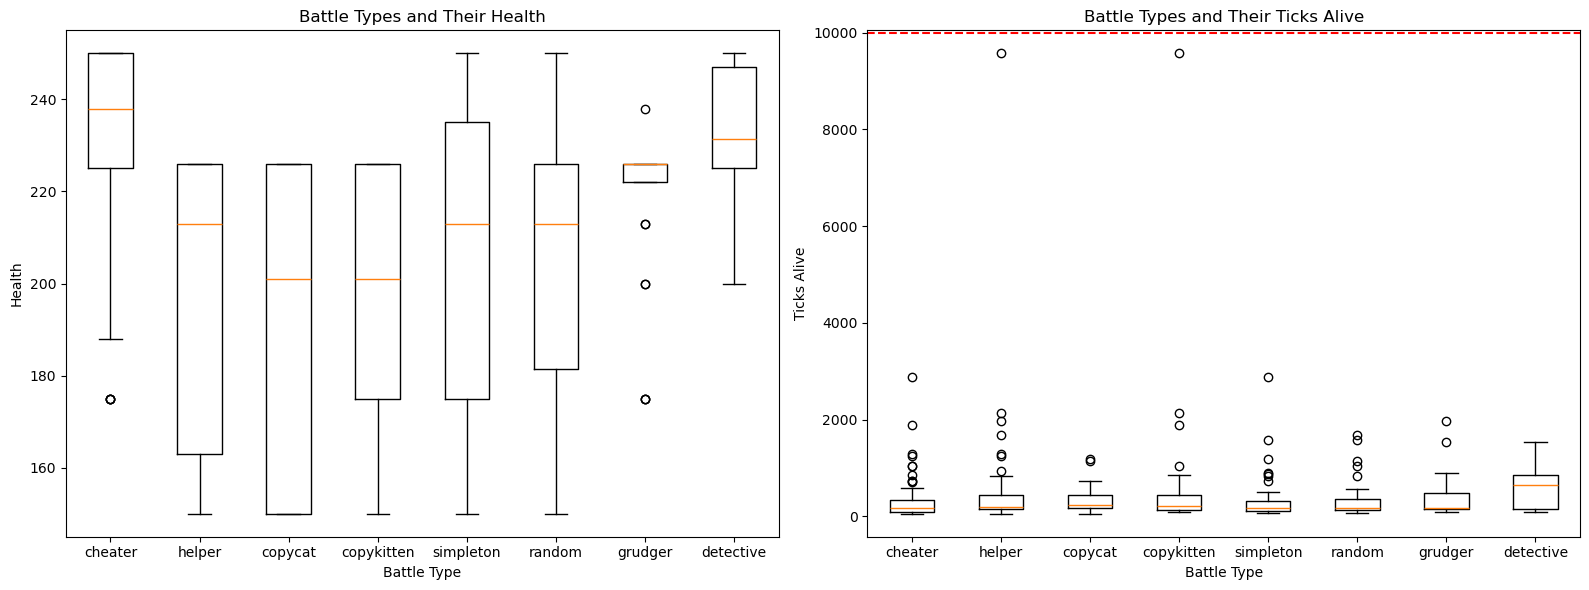

In [2]:
def load_log_data(file_path):
    with open(file_path, 'r') as file:
        json_data = json.load(file)
    plot_data = []
    stop_times = []
    for item in json_data:
        if item["class"] == "AgentHealthUpdate":
            battle_type = item["battle_type"]
            if battle_type in BATTLE_TYPES:
                plot_data.append([item["ticks"], item["health"], battle_type])
        elif item["class"] == "SimStopReason" and item["ticks"] != MAX_TICKS:
            stop_times.append(item["ticks"])
    return plot_data, stop_times

all_plot_data = []
all_stop_times = []
for file_name in os.listdir(FOLDER_PATH):
    if file_name.endswith('.json') and file_name != 'config.json':
        file_path = os.path.join(FOLDER_PATH, file_name)
        plot_data, stop_reasons = load_log_data(file_path)
        all_plot_data.extend(plot_data)
        all_stop_times.extend(stop_reasons)

health_data = {battle_type: [] for battle_type in BATTLE_TYPES}
ticks_data = {battle_type: [] for battle_type in BATTLE_TYPES}
for ticks, health, battle_type in all_plot_data:
    health_data[battle_type].append(health)
    ticks_data[battle_type].append(ticks)


total_health = {battle_type: sum(health_data[battle_type]) for battle_type in BATTLE_TYPES}
max_ticks_alive = {battle_type: max(ticks_data[battle_type]) for battle_type in BATTLE_TYPES}

best_run_health = max(total_health, key=total_health.get)
best_run_ticks = max(max_ticks_alive, key=max_ticks_alive.get)

for i in all_stop_times:
    if i != MAX_TICKS:
        print(i)

plt.figure(figsize=(16, 6))

# Create boxplot for health
plt.subplot(1, 2, 1)
health_values_by_type = [health_data[battle_type] for battle_type in BATTLE_TYPES]
plt.boxplot(health_values_by_type, labels=BATTLE_TYPES)
plt.xlabel('Battle Type')
plt.ylabel('Health')
plt.title('Battle Types and Their Health')


# Create boxplot for ticks alive
plt.subplot(1, 2, 2)
ticks_values_by_type = [ticks_data[battle_type] for battle_type in BATTLE_TYPES]
plt.boxplot(ticks_values_by_type, labels=BATTLE_TYPES)
plt.axhline(y=MAX_TICKS, color='r', linestyle='--', label=f'{MAX_TICKS} Ticks')
plt.xlabel('Battle Type')
plt.ylabel('Ticks Alive')
plt.title('Battle Types and Their Ticks Alive')

plt.tight_layout()
plt.show()

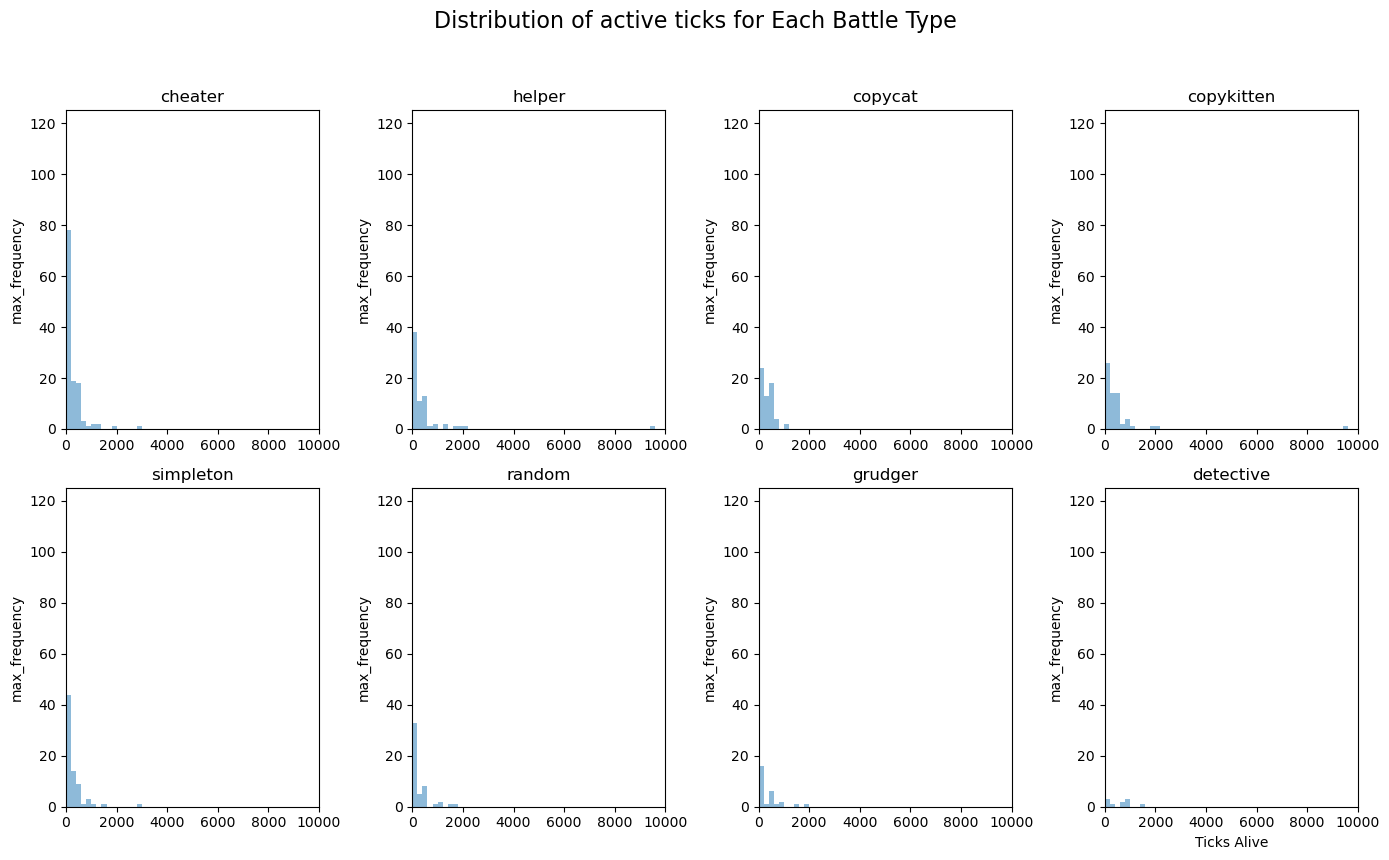

In [7]:
def load_log_data(file_path):
    battle_types = ["cheater", "helper", "copycat", "copykitten", "simpleton", "random", "grudger", "detective"]
    with open(file_path, 'r') as file:
        json_data = json.load(file)
    plot_data = []
    for item in json_data:
        if item["class"] == "AgentHealthUpdate":
            battle_type = item["battle_type"]
            if battle_type in battle_types:
                plot_data.append([item["ticks"], item["health"], battle_type])
    return plot_data

ll_plot_data = []
for file_name in os.listdir(FOLDER_PATH):
    if file_name.endswith('.json') and file_name != 'config.json':
        file_path = os.path.join(FOLDER_PATH, file_name)
        plot_data = load_log_data(file_path)
        all_plot_data.extend(plot_data)

num_bins = 50
ticks_min = 0
ticks_max = 10000
max_frequency = max(len(ticks_data[battle_type]) for battle_type in BATTLE_TYPES)
bin_edges = np.linspace(ticks_min, ticks_max, num_bins + 1)
num_rows = 2
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 9))


for i, battle_type in enumerate(BATTLE_TYPES):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].hist(ticks_data[battle_type], bins=bin_edges, alpha=0.5)
    axes[row, col].set_title(battle_type)
    axes[row, col].set_ylabel('max_frequency')
    axes[row, col].set_xlim(ticks_min, ticks_max)
    axes[row, col].set_ylim(0, max_frequency)
    
plt.xlabel('Ticks Alive')
plt.suptitle('Distribution of active ticks for Each Battle Type', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

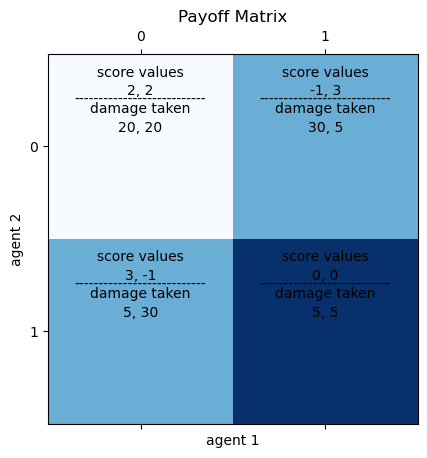

In [4]:
color_matrix = np.array([[1, 2],
                         [2, 3]])

values = np.array([[(2, 2), (-1, 3)],[(3, -1), (0, 0)]])
damage = np.array([[(20, 20), (30, 5)],[(5, 30), (5, 5)]])

fig, ax = plt.subplots()

cax = ax.matshow(color_matrix, cmap=plt.cm.Blues)

plt.xlabel("agent 2 Strategies")
plt.ylabel("agent 1 Strategies")

for i in range(len(values)):
    for j in range(len(values[i])):
        plt.text(j, i-.4, "score values", va='center', ha='center')
        plt.text(j, i-.3, f"{values[i, j][0]}, {values[i, j][1]}", va='center', ha='center')
        plt.text(j, i-.25, f"---------------------------", va='center', ha='center')
        plt.text(j, i-.2, "damage taken", va='center', ha='center')
        plt.text(j, i-.1, f"{damage[i, j][0]}, {damage[i, j][1]}", va='center', ha='center')

plt.title('Payoff Matrix')
plt.xlabel('agent 1')
plt.ylabel('agent 2')
plt.show()